# Sector-wise Technical Analysis and Performance of Nifty Stocks (2020–2023)


This project analyzes the historical performance of selected Nifty 50 companies across different sectors from 2020 to 2023. Using key technical indicators such as MACD (Moving Average Convergence Divergence), RSI (Relative Strength Index), and Bollinger Bands, the study evaluates trends, momentum, and volatility of each stock. Additionally, 3-year cumulative returns are calculated to quantify overall performance and identify the best and worst-performing stocks in each sector. The project combines interactive visualizations, performance tables, and technical analysis to provide a comprehensive, sector-wise insight into stock behavior, enabling data-driven investment decisions.

We analyzed stock performance using the **Exponential Moving Average (EMA)**, **Relative Strength Index (RSI)**, **Moving Average Convergence Divergence (MACD)**, **Bollinger Bands (BB)**, and **Cumulative Returns (CR)**.


In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

tickers = [
    "TCS.NS",        # IT
    "INFY.NS",       # IT
    "HDFCBANK.NS",   # Banking
    "ICICIBANK.NS",  # Banking
    "RELIANCE.NS",   # Oil & Gas
    "ITC.NS",        # FMCG
    "TATAMOTORS.NS", # Automobiles00
    "M&M.NS",        # Automobiles
    "SUNPHARMA.NS",  # Pharma
    "TATASTEEL.NS"   # Steel/Infra
]
# Download data
data = yf.download(
    tickers,
    start="2020-01-01",
    end="2023-12-31",
    auto_adjust=False,
    group_by="ticker"
)

# Collect all in one clean DataFrame
all_data = []
for ticker in tickers:
    df = data[ticker].copy()
    df["Ticker"] = ticker
    all_data.append(df)


final_df = pd.concat(all_data).reset_index()

final_df = final_df[["Ticker", "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

print(final_df.head(800))


print(final_df.tail())


[*********************100%***********************]  10 of 10 completed

Price  Ticker       Date         Open         High          Low        Close  \
0      TCS.NS 2020-01-01  2168.000000  2183.899902  2154.000000  2167.600098   
1      TCS.NS 2020-01-02  2179.949951  2179.949951  2149.199951  2157.649902   
2      TCS.NS 2020-01-03  2164.000000  2223.000000  2164.000000  2200.649902   
3      TCS.NS 2020-01-06  2205.000000  2225.949951  2187.899902  2200.449951   
4      TCS.NS 2020-01-07  2200.500000  2214.649902  2183.800049  2205.850098   
..        ...        ...          ...          ...          ...          ...   
795    TCS.NS 2023-03-13  3333.000000  3369.800049  3272.000000  3281.949951   
796    TCS.NS 2023-03-14  3280.000000  3304.399902  3209.399902  3214.949951   
797    TCS.NS 2023-03-15  3250.000000  3260.350098  3192.000000  3198.899902   
798    TCS.NS 2023-03-16  3208.000000  3219.800049  3172.000000  3185.000000   
799    TCS.NS 2023-03-17  3150.500000  3221.399902  3144.000000  3179.300049   

Price    Adj Close   Volume  
0      19

## EMA

In [2]:
final_df["EMA_9"] = final_df.groupby("Ticker")["Close"].transform(
    lambda x: x.ewm(span=9, adjust=False).mean()
)

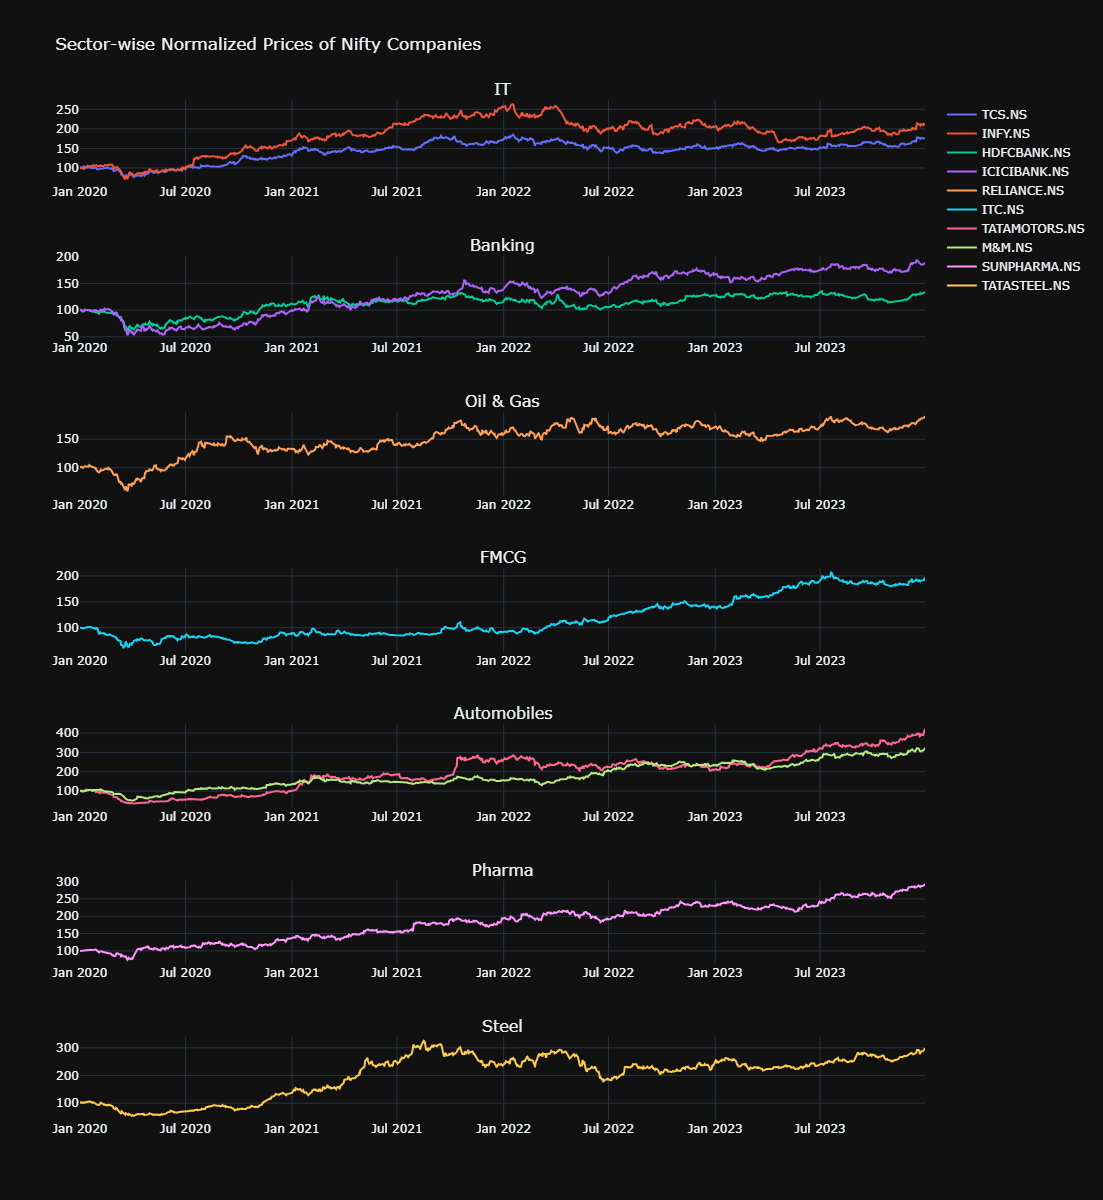

In [19]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tickers by sector
sectors = {
    "IT": ["TCS.NS", "INFY.NS"],
    "Banking": ["HDFCBANK.NS", "ICICIBANK.NS"],
    "Oil & Gas": ["RELIANCE.NS"],
    "FMCG": ["ITC.NS"],
    "Automobiles": ["TATAMOTORS.NS", "M&M.NS"],
    "Pharma": ["SUNPHARMA.NS"],
    "Steel": ["TATASTEEL.NS"]
}


all_tickers = sum(sectors.values(), [])

normalized = final_df.pivot(index='Date', columns='Ticker', values='Close')

# Normalize from the first date (2020-01-01)
normalized = normalized / normalized.iloc[0] * 100

# Create subplots (rows = number of sectors)
fig = make_subplots(rows=len(sectors), cols=1,
                    subplot_titles=list(sectors.keys()))

row = 1
for sector, tickers in sectors.items():
    for ticker in tickers:
        fig.add_trace(
            go.Scatter(x=normalized.index, y=normalized[ticker],
                       mode="lines", name=ticker),
            row=row, col=1
        )
    row += 1


fig.update_layout(
    title="Sector-wise Normalized Prices of Nifty Companies",
    template="plotly_dark",
    height=1200,
    showlegend=True
)

fig.show()


### MACD

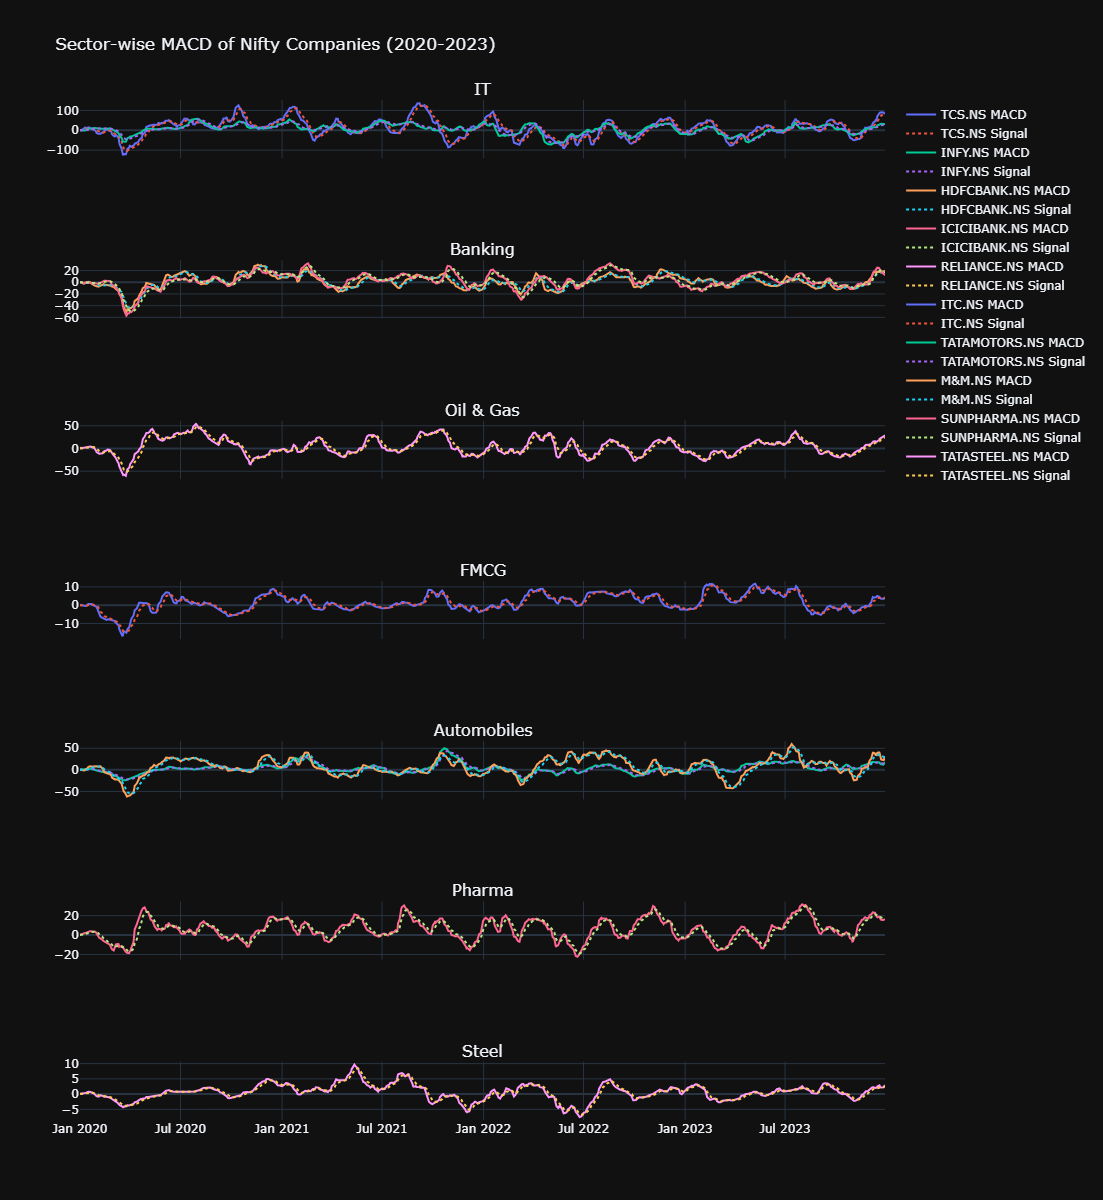

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


sectors = {
    "IT": ["TCS.NS", "INFY.NS"],
    "Banking": ["HDFCBANK.NS", "ICICIBANK.NS"],
    "Oil & Gas": ["RELIANCE.NS"],
    "FMCG": ["ITC.NS"],
    "Automobiles": ["TATAMOTORS.NS", "M&M.NS"],
    "Pharma": ["SUNPHARMA.NS"],
    "Steel": ["TATASTEEL.NS"]
}

# 2️⃣ Calculate MACD for all tickers
final_df["EMA_12"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=12, adjust=False).mean())
final_df["EMA_26"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=26, adjust=False).mean())
final_df["MACD"] = final_df["EMA_12"] - final_df["EMA_26"]
final_df["MACD_Signal"] = final_df.groupby("Ticker")["MACD"].transform(lambda x: x.ewm(span=9, adjust=False).mean())


fig = make_subplots(rows=len(sectors), cols=1, 
                    subplot_titles=list(sectors.keys()),
                    shared_xaxes=True,
                    vertical_spacing=0.1)

row = 1
for sector, tickers in sectors.items():
    for ticker in tickers:
        df = final_df[final_df["Ticker"] == ticker]
        # MACD line
        fig.add_trace(
            go.Scatter(x=df["Date"], y=df["MACD"], name=f"{ticker} MACD"),
            row=row, col=1
        )
        # Signal line
        fig.add_trace(
            go.Scatter(x=df["Date"], y=df["MACD_Signal"], name=f"{ticker} Signal", line=dict(dash="dot")),
            row=row, col=1
        )
    row += 1

fig.update_layout(
    title="Sector-wise MACD of Nifty Companies (2020-2023)",
    template="plotly_dark",
    height=1200,
    showlegend=True
)

fig.show()



## RSI

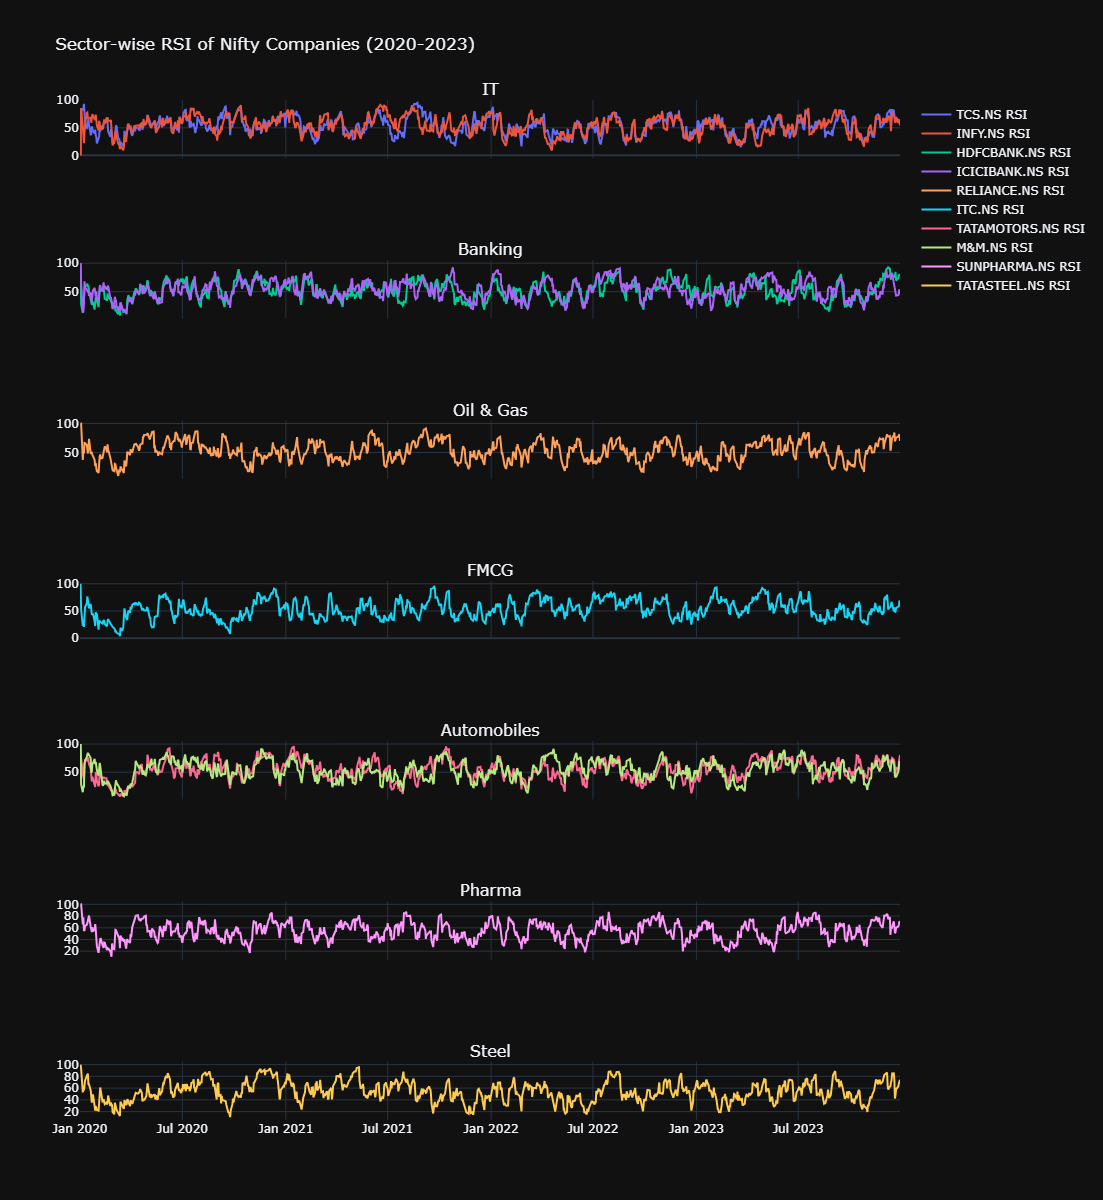

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


sectors = {
    "IT": ["TCS.NS", "INFY.NS"],
    "Banking": ["HDFCBANK.NS", "ICICIBANK.NS"],
    "Oil & Gas": ["RELIANCE.NS"],
    "FMCG": ["ITC.NS"],
    "Automobiles": ["TATAMOTORS.NS", "M&M.NS"],
    "Pharma": ["SUNPHARMA.NS"],
    "Steel": ["TATASTEEL.NS"]
}

#  Calculate RSI for all tickers (14-period)
final_df["Delta"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.diff())
final_df["Gain"] = final_df["Delta"].apply(lambda x: x if x > 0 else 0)
final_df["Loss"] = final_df["Delta"].apply(lambda x: -x if x < 0 else 0)
final_df["Avg_Gain"] = final_df.groupby("Ticker")["Gain"].transform(lambda x: x.ewm(span=14, adjust=False).mean())
final_df["Avg_Loss"] = final_df.groupby("Ticker")["Loss"].transform(lambda x: x.ewm(span=14, adjust=False).mean())
final_df["RS"] = final_df["Avg_Gain"] / final_df["Avg_Loss"]
final_df["RSI"] = 100 - (100 / (1 + final_df["RS"]))

# Optional: clean intermediate columns
final_df.drop(columns=["Delta", "Gain", "Loss", "Avg_Gain", "Avg_Loss", "RS"], inplace=True)


fig = make_subplots(
    rows=len(sectors), cols=1, 
    subplot_titles=list(sectors.keys()),
    shared_xaxes=True,
    vertical_spacing=0.1
)

row = 1
for sector, tickers in sectors.items():
    for ticker in tickers:
        df = final_df[final_df["Ticker"] == ticker]
        fig.add_trace(
            go.Scatter(x=df["Date"], y=df["RSI"], name=f"{ticker} RSI"),
            row=row, col=1
        )
    row += 1


fig.update_layout(
    title="Sector-wise RSI of Nifty Companies (2020-2023)",
    template="plotly_dark",
    height=1200,
    showlegend=True
)

fig.show()


## Bollinger Bands

In [8]:
# Bollinger Bands (20-day SMA + 2 std)
final_df["SMA_20"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=20).mean())
final_df["BB_Upper"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(20).mean() + 2*x.rolling(20).std())
final_df["BB_Lower"] = final_df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(20).mean() - 2*x.rolling(20).std())


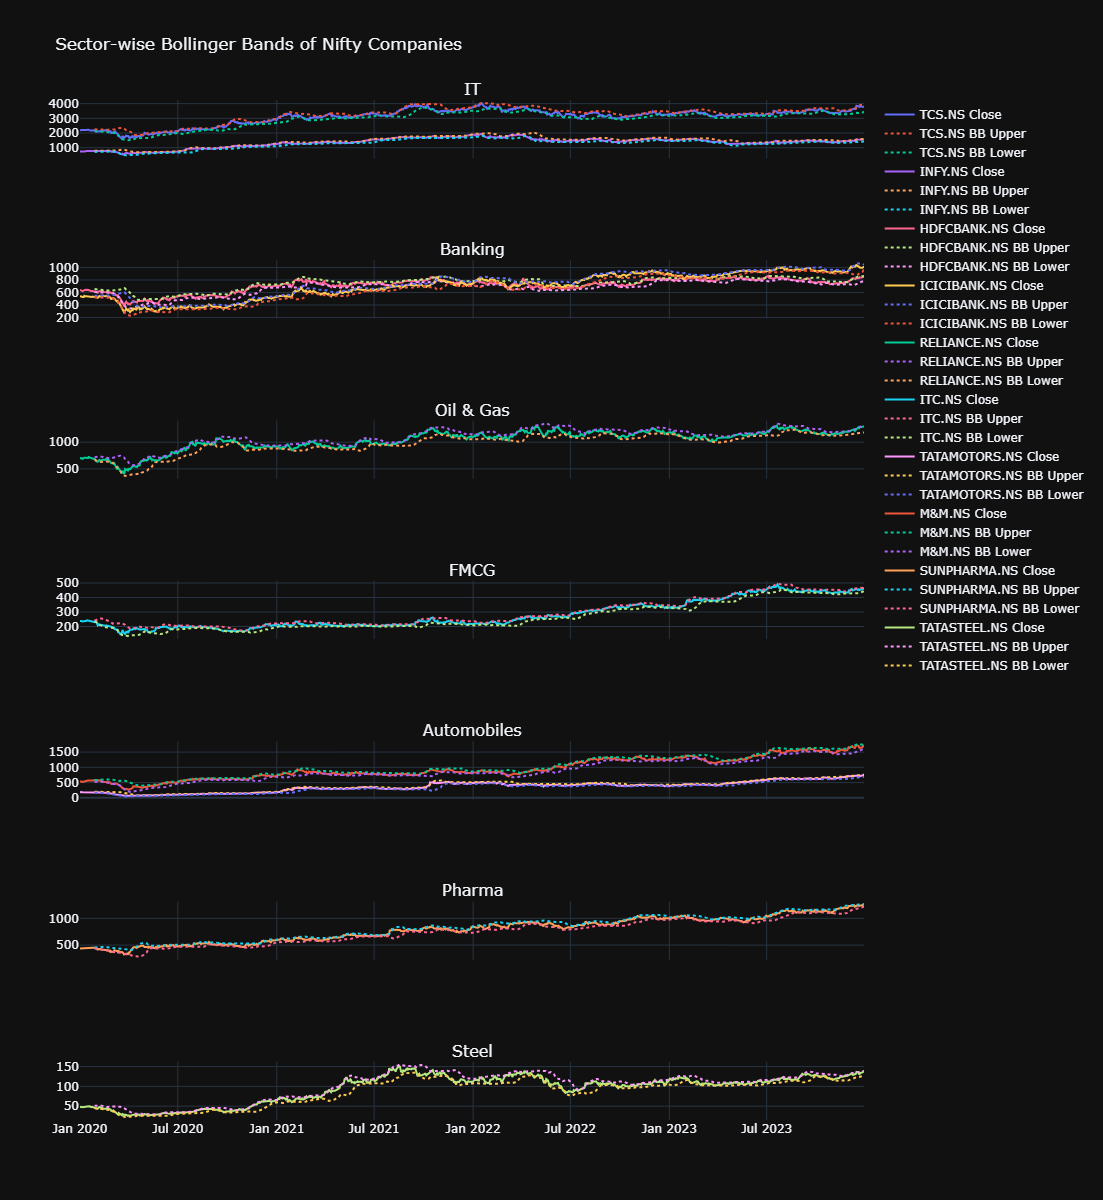

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=len(sectors), cols=1,
    subplot_titles=list(sectors.keys()),
    shared_xaxes=True,
    vertical_spacing=0.1
)

row = 1
for sector, tickers in sectors.items():
    for ticker in tickers:
        df = final_df[final_df["Ticker"] == ticker]
       
        fig.add_trace(go.Scatter(x=df["Date"], y=df["Close"], name=f"{ticker} Close"), row=row, col=1)
     
        fig.add_trace(go.Scatter(x=df["Date"], y=df["BB_Upper"], name=f"{ticker} BB Upper", line=dict(dash="dot")), row=row, col=1)
        fig.add_trace(go.Scatter(x=df["Date"], y=df["BB_Lower"], name=f"{ticker} BB Lower", line=dict(dash="dot")), row=row, col=1)
    row += 1

fig.update_layout(
    title="Sector-wise Bollinger Bands of Nifty Companies",
    template="plotly_dark",
    height=1200,
    showlegend=True
)
fig.show()


## Cumaltive return

In [10]:
# Pivot to have tickers as columns
cum_returns = final_df.pivot(index='Date', columns='Ticker', values='Close')
cum_returns = cum_returns / cum_returns.iloc[0] - 1  # cumulative returns
final_returns = cum_returns.iloc[-1] * 100  # final 3-year return in %
print(final_returns)


Ticker
HDFCBANK.NS       33.681373
ICICIBANK.NS      85.673028
INFY.NS          109.391338
ITC.NS            94.078116
M&M.NS           222.288502
RELIANCE.NS       87.277675
SUNPHARMA.NS     189.995392
TATAMOTORS.NS    322.851735
TATASTEEL.NS     198.450030
TCS.NS            75.004601
Name: 2023-12-29 00:00:00, dtype: float64


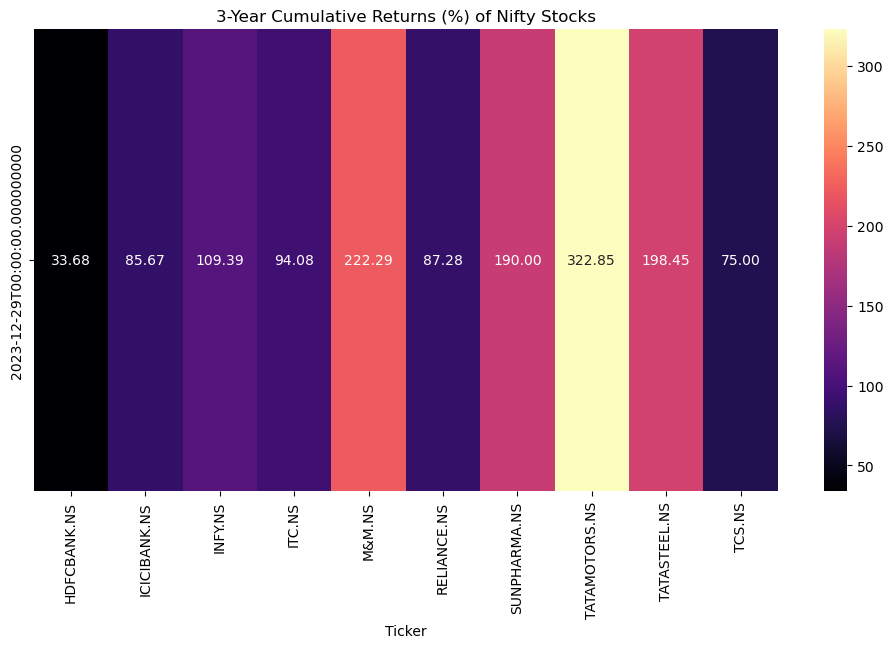

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(final_returns.to_frame().T, annot=True, fmt=".2f", cmap="magma")
plt.title("3-Year Cumulative Returns (%) of Nifty Stocks")
plt.show()


## Sector-wise Best Performing Stocks

In [16]:
import pandas as pd

best_stocks = {
    'IT': ('INFY.NS', 109.3913382011257),
    'Banking': ('ICICIBANK.NS', 85.67302758936887),
    'Oil & Gas': ('RELIANCE.NS', 87.27767535556465),
    'FMCG': ('ITC.NS', 94.07811602600901),
    'Automobiles': ('TATAMOTORS.NS', 322.851734947922),
    'Pharma': ('SUNPHARMA.NS', 189.9953917963857),
    'Steel': ('TATASTEEL.NS', 198.4500300364074)
}


table_df = pd.DataFrame([
    {"Sector": sector, "Best Stock": info[0], "3-Year Cumulative Return (%)": round(info[1], 2)}
    for sector, info in best_stocks.items()
])

table_df


Sector     Best Stock  3-Year Cumulative Return (%)
0           IT        INFY.NS                        109.39
1      Banking   ICICIBANK.NS                         85.67
2    Oil & Gas    RELIANCE.NS                         87.28
3         FMCG         ITC.NS                         94.08
4  Automobiles  TATAMOTORS.NS                        322.85
5       Pharma   SUNPHARMA.NS                        190.00
6        Steel   TATASTEEL.NS                        198.45

## Sector-wise Analysis (Top Stocks)

IT: INFY.NS delivered a 3-year return of 109.39%. Its MACD indicates a strong bullish trend, RSI remained mostly below overbought levels, and prices stayed within Bollinger Bands, suggesting steady growth with manageable volatility.

Banking: ICICIBANK.NS returned 85.67%. MACD shows bullish momentum, RSI rarely exceeded 70, and Bollinger Bands indicate moderate volatility.

Oil & Gas: RELIANCE.NS gave 87.28%. MACD shows a consistent bullish trend, RSI was rarely overbought, and prices stayed mostly within Bollinger Bands, indicating steady growth.

FMCG: ITC.NS returned 94.08%, with a bullish MACD, RSI below extreme levels, and stable Bollinger Bands.

Automobiles: TATAMOTORS.NS delivered 322.85%, with bullish MACD confirmation and RSI/Bollinger Bands supporting strong growth.

Pharma: SUNPHARMA.NS returned 189.99%, showing strong MACD trend and moderate volatility on Bollinger Bands.

Steel: TATASTEEL.NS delivered 198.45%, with consistent MACD, RSI under overbought levels, and prices within Bollinger Bands.

## Best Stock

TATAMOTORS.NS → 322.85%

Reason:

Highest cumulative return over 3 years

Likely strong bullish MACD trend

RSI and Bollinger Bands support growth

## Worst Stock

ICICIBANK.NS → 85.67%

Reason:

Lowest cumulative return among the selected stocks

While it may still have moderate trends, its growth was slower compared to others

## Summary Statement

Out of the selected Nifty stocks, TATAMOTORS.NS was the best performer with a 3-year cumulative return of 322.85%, showing strong momentum and steady growth. On the other hand, ICICIBANK.NS had the lowest return at 85.67%, making it the least favorable choice among these stocks during this period.